<a href="https://colab.research.google.com/github/MrT3313/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [66]:
# Put data into DataFrame 

#?# - What exactly is a 'dataFrame?' I don't see a difference in these two outputs

persons_data = pd.DataFrame(persons_data)
print(persons_data.shape)
persons_data.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


### Basic Individual Histograms

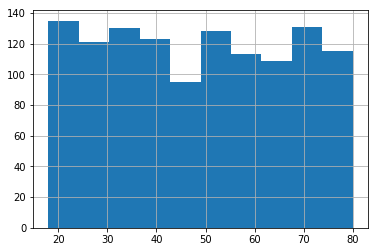

In [67]:
persons_data.age.hist()

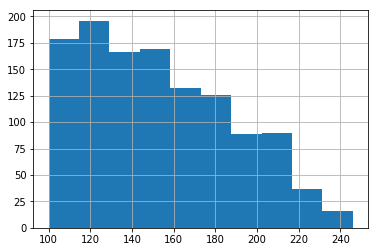

In [68]:
persons_data.weight.hist()

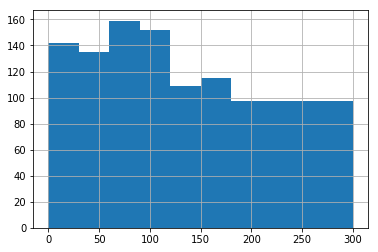

In [69]:
persons_data.exercise_time.hist()

### Initial Crosstabulation 


In [70]:
# W/o time_bins
pd.crosstab(persons_data['age'],persons_data['weight'])

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# W/ age_bins
age_bins = pd.cut(persons_data['age'], 5)
pd.crosstab(age_bins, persons_data['weight'])

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.938, 30.4]",1,3,5,1,2,2,2,1,6,3,2,4,1,4,5,5,6,4,0,5,2,2,1,2,1,3,2,1,3,1,3,3,2,3,1,2,3,6,4,1,4,5,2,2,4,3,2,4,4,1,2,0,2,4,4,4,3,5,3,2,2,2,2,2,4,4,1,1,2,2,0,3,2,3,0,3,1,2,0,0,1,1,3,3,1,1,0,1,3,0,1,2,3,0,2,1,0,1,1,2,1,0,0,2,3,1,0,0,2,1,3,0,0,0,2,0,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
"(30.4, 42.8]",4,4,2,2,1,4,4,5,3,5,2,2,2,5,1,1,6,6,2,1,6,1,4,2,7,4,6,2,4,6,0,3,0,2,3,2,2,4,5,2,1,1,2,2,2,0,3,4,2,3,0,3,1,3,4,1,1,2,4,1,3,4,1,1,1,3,0,0,4,2,1,0,2,1,1,1,0,4,0,2,3,1,0,2,1,1,7,2,1,1,0,1,0,0,0,0,2,0,2,2,1,0,1,3,3,2,2,0,2,2,2,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0
"(42.8, 55.2]",1,1,4,2,3,2,0,2,5,2,4,2,0,3,3,1,2,1,3,3,2,4,4,0,2,6,2,5,5,4,3,3,3,1,2,6,0,7,0,3,5,2,0,0,5,1,2,3,1,1,3,1,3,0,2,0,3,1,1,0,4,2,0,4,1,2,1,1,1,1,3,3,3,1,1,1,3,2,1,0,2,3,0,2,4,1,1,1,1,0,0,1,1,1,2,1,0,0,0,2,2,0,0,0,4,0,0,1,0,1,0,1,2,2,1,1,2,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
"(55.2, 67.6]",5,2,0,1,0,2,0,3,1,0,1,1,3,3,1,1,1,2,1,0,2,1,2,3,2,3,4,3,5,0,0,2,4,2,5,2,7,1,1,2,2,2,3,2,4,3,3,0,1,1,3,4,1,1,5,1,6,0,3,4,0,0,1,0,2,1,3,1,1,1,2,1,3,2,3,3,2,0,2,1,2,1,3,1,2,2,0,1,1,1,2,2,0,2,1,1,0,1,4,7,1,1,2,3,1,1,1,0,2,0,1,2,2,1,3,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0
"(67.6, 80.0]",4,0,2,2,3,0,2,0,4,3,5,1,2,5,1,0,0,1,0,2,1,1,2,2,5,2,3,4,0,3,2,3,0,1,0,1,3,1,3,5,4,2,1,0,0,2,0,2,2,3,5,1,3,5,0,1,3,1,0,2,4,4,3,1,3,2,3,0,3,3,3,2,1,2,1,0,2,1,2,0,2,4,7,5,1,1,2,2,4,2,1,0,0,2,1,1,1,3,2,2,4,0,1,1,1,1,1,1,3,2,2,1,3,0,2,0,2,0,3,1,1,1,2,1,0,2,1,0,1,3,2,0,0,0,1,0,1,1,0,0,0,1,0


In [72]:
# W/ weight_bins
weight_bins = pd.cut(persons_data['weight'], 20)
pd.crosstab(weight_bins, persons_data['age'])


age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 107.3]",1,0,3,1,1,0,1,1,1,2,2,3,1,1,1,3,4,1,1,5,1,2,3,2,2,2,1,1,1,1,1,0,0,2,3,2,0,1,0,0,2,4,0,2,1,2,1,1,0,0,2,1,2,1,0,0,3,1,1,0,0,2,0
"(107.3, 114.6]",1,1,0,3,2,3,2,2,1,2,1,4,3,1,1,1,3,1,1,1,3,2,3,3,0,1,0,0,1,0,2,3,2,1,2,2,4,1,0,0,2,0,1,2,0,1,1,1,1,1,1,3,2,4,1,3,0,2,2,2,0,1,0
"(114.6, 121.9]",3,2,1,1,1,3,2,2,1,1,4,2,1,1,3,4,3,2,0,1,3,1,0,3,2,0,1,1,2,1,2,0,0,3,1,0,1,4,0,3,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,1,0
"(121.9, 129.2]",2,1,2,0,0,3,1,2,0,1,2,0,0,4,2,2,4,4,3,2,4,4,2,4,0,2,4,3,2,1,1,1,4,3,1,2,2,2,3,5,0,3,0,2,1,0,2,2,1,3,1,3,4,3,1,2,2,0,1,1,0,1,2
"(129.2, 136.5]",1,1,0,1,3,1,1,1,1,1,3,2,1,2,1,1,1,1,1,0,0,2,2,1,0,1,4,1,1,1,1,3,2,0,1,0,1,2,1,2,1,0,4,2,2,2,2,0,1,5,0,0,2,3,0,0,1,0,0,0,1,1,2
"(136.5, 143.8]",5,1,1,1,2,2,0,1,3,0,3,3,2,2,0,1,3,0,0,0,3,1,3,3,1,1,1,1,2,2,1,4,0,0,2,1,0,2,2,0,0,2,0,2,0,2,2,1,1,1,2,3,0,1,2,0,0,5,1,1,0,1,0
"(143.8, 151.1]",2,0,2,0,2,0,0,4,1,2,3,2,2,0,1,3,4,0,0,2,2,1,2,2,0,2,1,0,0,2,1,1,0,4,1,1,2,2,2,1,2,4,0,2,2,1,2,2,0,1,1,3,1,0,3,0,0,2,1,2,1,1,0
"(151.1, 158.4]",0,5,1,3,2,2,3,1,4,0,1,1,2,2,0,2,1,2,1,0,3,0,0,4,1,1,1,0,0,0,0,3,1,0,0,1,0,3,1,3,0,2,1,1,2,1,3,1,1,1,1,3,2,1,0,0,2,0,1,0,2,0,1
"(158.4, 165.7]",1,1,2,2,2,1,1,0,1,2,0,4,1,0,4,1,1,0,3,0,0,0,0,3,2,0,2,0,2,3,2,2,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,1,2,2,3,2,1,2,3,2,1,0,0,1,2,0


In [0]:
# W/ age_bins & weight_bins

#?# Why can't this work with 2 data bins?? --> its trying to use a bin as a column (when in the second position) vs an index (when in the first position)
## use docs to debug --> pd.crosstab() -> put curser inside '()' and hit tab

age_bins = pd.cut(persons_data['age'], 5)
weight_bins = pd.cut(persons_data['weight'], 20)

pd.crosstab(age_bins, weight_bins)

pd.crosstab()

In [75]:
# W/ weight_bins --> using NORMALIZE to look at %
weight_bins = pd.cut(persons_data['weight'], 20)
pd.crosstab(weight_bins, persons_data['age'], normalize='columns')

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 107.3]",0.05,0.000000,0.176471,0.055556,0.052632,0.000000,0.058824,0.052632,0.066667,0.1250,0.083333,0.115385,0.047619,0.052632,0.05,0.115385,0.137931,0.047619,0.066667,0.333333,0.04,0.095238,0.136364,0.06250,0.250,0.153846,0.047619,0.1,0.076923,0.045455,0.0625,0.000000,0.000000,0.086957,0.15,0.166667,0.000000,0.041667,0.000000,0.000000,0.133333,0.181818,0.000000,0.090909,0.066667,0.105263,0.043478,0.066667,0.0000,0.000000,0.10,0.035714,0.105263,0.037037,0.000000,0.000000,0.15,0.055556,0.0625,0.000000,0.000000,0.133333,0.000000
"(107.3, 114.6]",0.05,0.043478,0.000000,0.166667,0.105263,0.142857,0.117647,0.105263,0.066667,0.1250,0.041667,0.153846,0.142857,0.052632,0.05,0.038462,0.103448,0.047619,0.066667,0.066667,0.12,0.095238,0.136364,0.09375,0.000,0.076923,0.000000,0.0,0.076923,0.000000,0.1250,0.136364,0.153846,0.043478,0.10,0.166667,0.285714,0.041667,0.000000,0.000000,0.133333,0.000000,0.076923,0.090909,0.000000,0.052632,0.043478,0.066667,0.0625,0.047619,0.05,0.107143,0.105263,0.148148,0.055556,0.157895,0.00,0.111111,0.1250,0.153846,0.000000,0.066667,0.000000
"(114.6, 121.9]",0.15,0.086957,0.058824,0.055556,0.052632,0.142857,0.117647,0.105263,0.066667,0.0625,0.166667,0.076923,0.047619,0.052632,0.15,0.153846,0.103448,0.095238,0.000000,0.066667,0.12,0.047619,0.000000,0.09375,0.250,0.000000,0.047619,0.1,0.153846,0.045455,0.1250,0.000000,0.000000,0.130435,0.05,0.000000,0.071429,0.166667,0.000000,0.125000,0.066667,0.045455,0.000000,0.045455,0.133333,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.111111,0.0000,0.000000,0.142857,0.066667,0.000000
"(121.9, 129.2]",0.10,0.043478,0.117647,0.000000,0.000000,0.142857,0.058824,0.105263,0.000000,0.0625,0.083333,0.000000,0.000000,0.210526,0.10,0.076923,0.137931,0.190476,0.200000,0.133333,0.16,0.190476,0.090909,0.12500,0.000,0.153846,0.190476,0.3,0.153846,0.045455,0.0625,0.045455,0.307692,0.130435,0.05,0.166667,0.142857,0.083333,0.176471,0.208333,0.000000,0.136364,0.000000,0.090909,0.066667,0.000000,0.086957,0.133333,0.0625,0.142857,0.05,0.107143,0.210526,0.111111,0.055556,0.105263,0.10,0.000000,0.0625,0.076923,0.000000,0.066667,0.105263
"(129.2, 136.5]",0.05,0.043478,0.000000,0.055556,0.157895,0.047619,0.058824,0.052632,0.066667,0.0625,0.125000,0.076923,0.047619,0.105263,0.05,0.038462,0.034483,0.047619,0.066667,0.000000,0.00,0.095238,0.090909,0.03125,0.000,0.076923,0.190476,0.1,0.076923,0.045455,0.0625,0.136364,0.153846,0.000000,0.05,0.000000,0.071429,0.083333,0.058824,0.083333,0.066667,0.000000,0.307692,0.090909,0.133333,0.105263,0.086957,0.000000,0.0625,0.238095,0.00,0.000000,0.105263,0.111111,0.000000,0.000000,0.05,0.000000,0.0000,0.000000,0.071429,0.066667,0.105263
"(136.5, 143.8]",0.25,0.043478,0.058824,0.055556,0.105263,0.095238,0.000000,0.052632,0.200000,0.0000,0.125000,0.115385,0.095238,0.105263,0.00,0.038462,0.103448,0.000000,0.000000,0.000000,0.12,0.047619,0.136364,0.09375,0.125,0.076923,0.047619,0.1,0.153846,0.090909,0.0625,0.181818,0.000000,0.000000,0.10,0.083333,0.000000,0.083333,0.117647,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.105263,0.086957,0.066667,0.0625,0.047619,0.10,0.107143,0.000000,0.037037,0.111111,0.000000,0.00,0.277778,0.0625,0.076923,0.000000,0.066667,0.000000
"(143.8, 151.1]",0.10,0.000000,0.117647,0.000000,0.105263,0.000000,0.000000,0.210526,0.066667,0.1250,0.125000,0.076923,0.095238,0.000000,0.05,0.115385,0.137931,0.000000,0.000000,0.133333,0.08,0.047619,0.090909,0.06250,0.000,0.153846,0.047619,0.0,0.000000,0.090909,0.0625,0.045455,0.000000,0.173913,0.05,0.083333,0.142857,0.083333,0.117647,0.041667,0.133333,0.181818,0.000000,0.090909,0.133333,0.052632,0.086957,0.133333,0.0000,0.047619,0.05,0.107143,0.052632,0.000000,0.166667,0

In [76]:
# COMBINING AGE BINS!!

age_bins = pd.cut(persons_data['age'], 5)

pd.crosstab(age_bins, [persons_data['weight'],persons_data['exercise_time']], normalize='columns')

weight          100                                                                        101                                               102                                                              103                                     104                                          105                                               106                                     107                                                    108                                                                                            109                                                              110                                                                   111                                               112                                     113                                                                                            114                                               115                                     116                                                    \
exercise_time   2    4    18   46   54   79   163  196  206  216  226  264  277  280  286  66   126  164  182  195  196  219  222  254  300  24   78   84   129  136  174  219  224  236  244  276  280  285  21   64   93   163  165  276  284  289  10   36   61   93   139  221  229  247  280  3    13   17   159  174  200  242  289  296  299  51   103  112  160  171  198  263  299  86   120  125  145  158  178  185  208  222  258  261  53   62   68   126  136  138  154  161  170  207  208  214  234  245  261  262  287  288  298  25   44   77   98   111  117  142  164  173  194  197  219  235  16   51   66   89   101  104  121  131  142  148  161  186  203  284  10   58   126  138  170  213  219  252  282  297  33   54   86   136  145  239  252  270  16   21   37   50   66   73   93   144  150  185  188  232  234  235  254  273  276  293  296  43   69   104  144  173  180  195  265  273  291  128  147  186  192  243  249  258  287  24   37   52   70   82   85   111  162  163  182  199   
age                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
(17.938, 30.4]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
(30.4, 4

## Final Submission

 %%time --> how long a cell takes to run
 
 %timeit --> how long a single line takes to run


In [0]:

import pandas as pd
import seaborn as sns

In [78]:
pd.set_option('display.max_rows', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('https://raw.githubusercontent.com/dwightchurchill/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv')
df = df.rename(columns={'Unnamed: 0':'ID'})
df.head()

,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
# Set All Bins
exercise_time_BINs = pd.cut(df.exercise_time, 5)
age_BINs = pd.cut(df.age, 5)
weight_BINs = pd.cut(df.weight, 5)

In [80]:
# crosstab V1 -> Exercise Time = Main Bin
pd.crosstab(exercise_time_BINs, [age_BINs, weight_BINs], normalize='columns')

age             (17.938, 30.4]                                                                (30.4, 42.8]                                                                (42.8, 55.2]                                                                (55.2, 67.6]                                                                (67.6, 80.0]                                                            
weight         (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0]
exercise_time                                                                                                                                                                                                                                                                                                                                                                                             
(-0.3, 60.0]            0.1250       0.081395       0.224490       0.500000            1.0        0.076923       0.161290       0.204082       0.548387            1.0        0.089744       0.112903       0.224490       0.346154          0.875        0.132075       0.084507       0.222222       0.340909       0.888889        0.350000       0.259259       0.287879       0.409091       0.681818
(60.0, 120.0]           0.1125       0.174419       0.244898       0.294118            0.0        0.182692       0.129032       0.326531       0.387097            0.0        0.076923       0.145161       0.285714       0.461538          0.125        0.188679       0.281690       0.422222       0.477273       0.111111        0.350000       0.444444       0.484848       0.409091       0.318182
(120.0, 180.0]          0.2125       0.232558       0.204082       0.205882            0.0        0.182692       0.129032       0.265306       0.064516            0.0        0.115385       0.209677       0.244898       0.192308          0.000        0.245283       0.197183       0.133333       0.159091       0.000000        0.216667       0.222222       0.227273       0.181818       0.000000
(180.0, 240.0]          0.2375       0.337209       0.265306       0.000000            0.0        0.240385       0.241935       0.142857       0.000000            0.0        0.230769       0.112903       0.183673       0.000000          0.000        0.226415       0.267606       0.200000       0.022727       0.000000        0.083333       0.074074       0.000000       0.000000       0.000000
(240.0, 300.0]          0.3125       0.174419       0.061224       0.000000            0.0        0.317308       0.338710       0.061224       0.000000            0.0        0.487179       0.419355       0.061224       0.000000          0.000        0.207547       0.169014       0.022222       0.000000       0.000000        0.000000       0.000000       0.000000       0.000000       0.000000

In [81]:
# # crosstab V1 -> Age = Main Bin
pd.crosstab(age_BINs, [exercise_time_BINs, weight_BINs], normalize='columns')

exercise_time     (-0.3, 60.0]                                                               (60.0, 120.0]                                                              (120.0, 180.0]                                               (180.0, 240.0]                                               (240.0, 300.0]                              
weight         (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (216.8, 246.0] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6] (187.6, 216.8] (99.854, 129.2] (129.2, 158.4] (158.4, 187.6]
age                                                                                                                                                                                                                                                                                                                                           
(17.938, 30.4]        0.188679       0.159091       0.180328       0.223684       0.159091        0.138462       0.197368       0.129032       0.136986       0.000000        0.239437       0.298507       0.178571       0.241379        0.240506       0.391892       0.342105            0.0        0.233645       0.202703            0.3
(30.4, 42.8]          0.150943       0.227273       0.163934       0.223684       0.159091        0.292308       0.105263       0.172043       0.164384       0.000000        0.267606       0.119403       0.232143       0.068966        0.316456       0.202703       0.184211            0.0        0.308411       0.283784            0.3
(42.8, 55.2]          0.132075       0.159091       0.180328       0.118421       0.159091        0.092308       0.118421       0.150538       0.164384       0.111111        0.126761       0.194030       0.214286       0.172414        0.227848       0.094595       0.236842            0.0        0.355140       0.351351            0.3
(55.2, 67.6]          0.132075       0.136364       0.163934       0.197368       0.181818        0.153846       0.263158       0.204301       0.287671       0.111111        0.183099       0.208955       0.107143       0.241379        0.151899       0.256757       0.236842            1.0        0.102804       0.162162            0.1
(67.6, 80.0]          0.396226       0.318182       0.311475       0.236842       0.340909        0.323077       0.315789       0.344086       0.246575       0.777778        0.183099       0.179104       0.267857       0.275862        0.063291       0.054054       0.000000            0.0        0.000000       0.000000            0.0

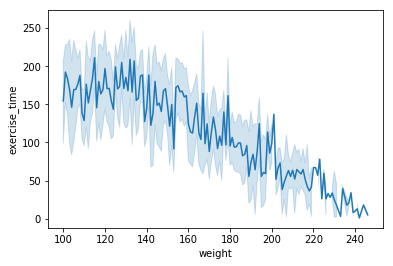

In [82]:
sns.lineplot('weight','exercise_time',data=df);

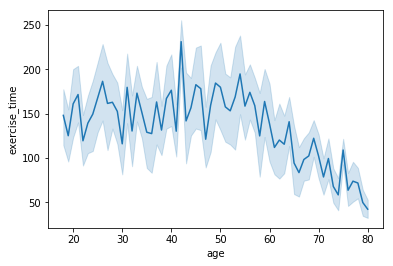

In [83]:
sns.lineplot('age','exercise_time',data=df);

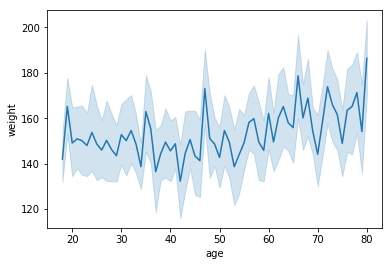

In [84]:
sns.lineplot('age','weight',data=df);

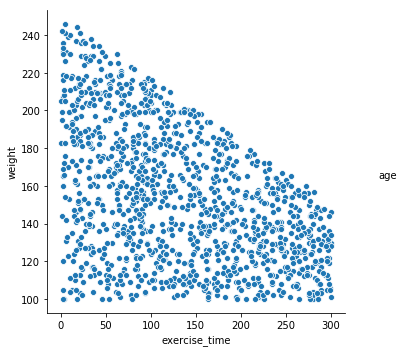

In [85]:
new_age_bins = pd.cut(df.age,bins=[1])

sns.relplot(x='exercise_time', y='weight', hue=new_age_bins,data=df);

## HW Questions
1) What are the variable types in the data
   - Age = continuous
   - Weight = discrete
   - Exercise Time = continuous
 
2) What are the relationships between the variables
   - After ~ the age of 50 exervice time trends negative. Before this time the gerenal trend is flat to very slightly positive
   - People who exercise more weigh less
   - There is not a significant corelation between age and weight
 
3) Which relationships are 'real' and which are spurious
   - exercise time & weight = REAL
   - age & weight = SPURIOUS
   - exercise time & age = REAL (smaller correlation < age 50 and strong correlation > age 50)

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)